In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.dropna(subset = ['LotFrontage'], axis=0, inplace=True) # Removes rows with null values from the LorFrontage column
df.shape

(1201, 81)

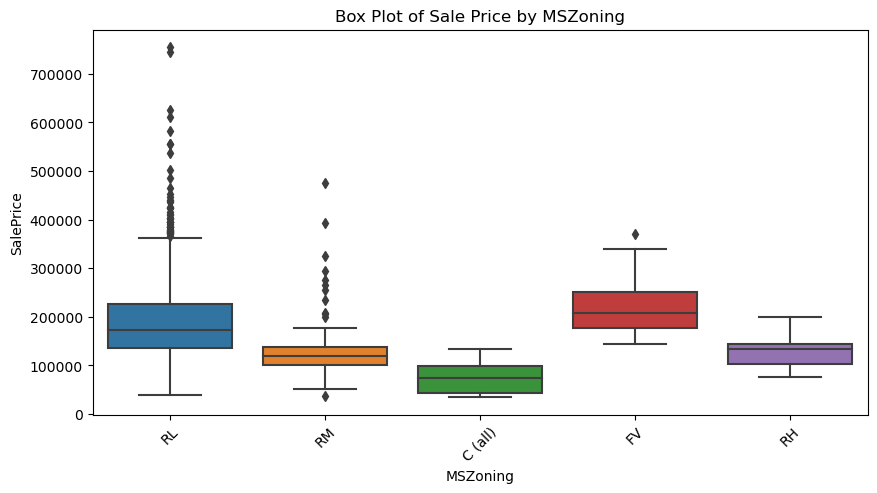

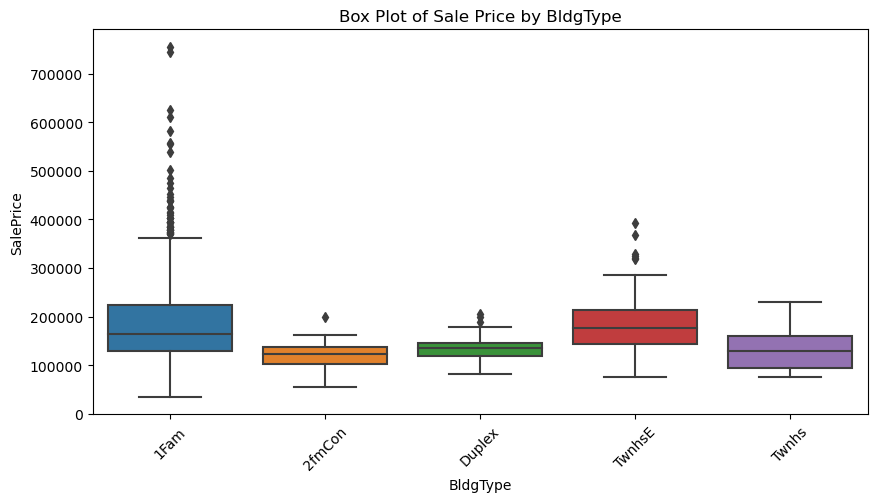

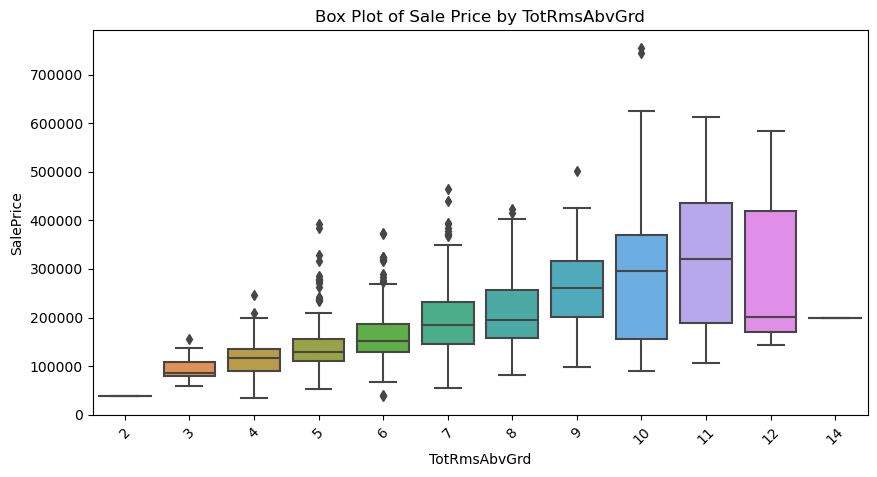

In [7]:
cols = ['MSZoning', 'BldgType', 'TotRmsAbvGrd']

for col in cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Box Plot of Sale Price by {col}')
    plt.show()
    

In [8]:
categorical_col = [col for col in df.columns if df[col].dtype == "object"]
print("categorical columns: ", categorical_col, '\n\n')

numerical_col = [col for col in df.columns if df[col].dtype != "object"]
print("Numerical columns: ", numerical_col)

categorical columns:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 


Numerical columns:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',

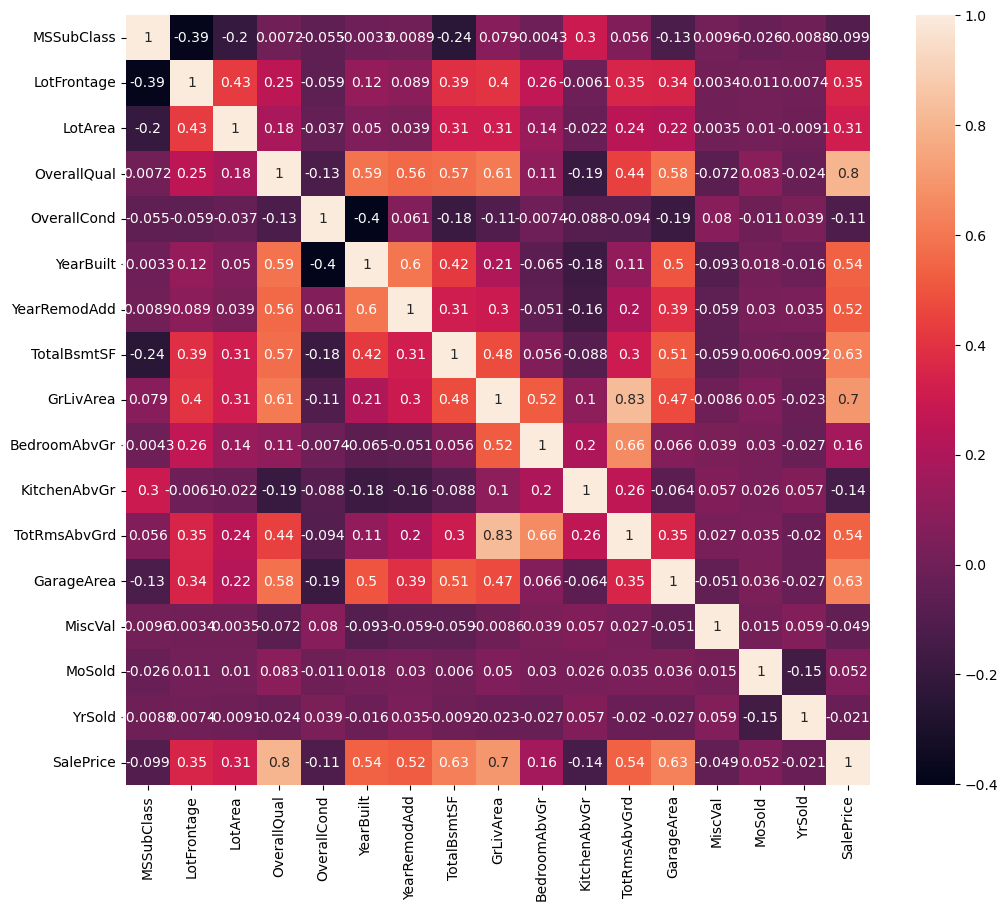

<Figure size 640x480 with 0 Axes>

In [29]:
num_col = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
           'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'MiscVal', 'MoSold', 'YrSold']

corr_matrix = df[num_col + ['SalePrice']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()
plt.savefig("Feature Correlations")

Encoding Categorical Data

In [10]:
df_copy = df.copy()
encoded_df = df
categorical_cols = encoded_df.select_dtypes(include=['object']).columns

data = pd.get_dummies(df, columns=categorical_cols)
data
    

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


Feature Scaling and Selection


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

scaler = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaler,columns = X.columns)
X_scaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.725113,0.065025,-0.208034,-0.189583,0.618629,-0.513699,1.021506,0.840573,0.503415,0.600644,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
1,-1.722737,-0.863297,0.409895,-0.044400,-0.086279,2.228313,0.170767,-0.433726,-0.554176,1.186351,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
2,-1.720361,0.065025,-0.084449,0.163905,0.618629,-0.513699,0.958488,0.793377,0.319955,0.126910,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
3,-1.717985,0.297106,-0.414011,-0.050713,0.618629,-0.513699,-1.751273,-0.716904,-0.554176,-0.454490,...,-0.064658,-0.334719,-0.050042,0.418505,3.646590,-0.057807,-0.091631,-0.123351,-2.001041,-0.339315
4,-1.715609,0.065025,0.574676,0.543905,1.323537,-0.513699,0.926979,0.698984,1.334379,0.490824,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,1.732063,0.065025,-0.331620,-0.256872,-0.086279,-0.513699,0.895471,0.698984,-0.554176,-0.919610,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
1197,1.734439,-0.863297,0.615871,0.406928,-0.086279,0.400305,0.233785,0.132629,0.087932,0.781524,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
1198,1.736816,0.297106,-0.166839,-0.114846,0.618629,3.142317,-0.932043,0.982162,-0.554176,-0.327443,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315
1199,1.739192,-0.863297,-0.084449,-0.029630,-0.791187,0.400305,-0.648463,0.510199,-0.554176,-0.814097,...,-0.064658,-0.334719,-0.050042,0.418505,-0.274229,-0.057807,-0.091631,-0.123351,0.499740,-0.339315


In [12]:
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
X_imputed = imp.fit_transform(X_scaled)

fs = SelectKBest(score_func=f_regression, k=10)
best = fs.fit_transform(X_imputed,y)

features = X_scaled.columns

best_features = features[fs.get_support()]
print(best_features)

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'GarageArea', 'ExterQual_TA', 'BsmtQual_Ex'],
      dtype='object')


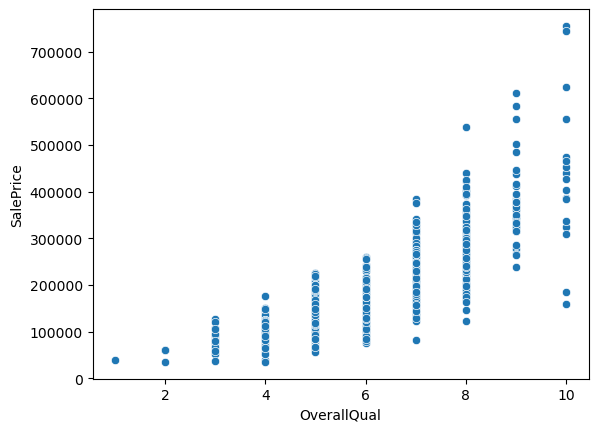

In [13]:
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')
plt.savefig('Best Feature: Overall Quality')

Modelling

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled[best_features], y, test_size = 0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((960, 10), (960,), (241, 10), (241,))

In [15]:
from sklearn.linear_model import LinearRegression

lr_reg =LinearRegression()
lr_model = lr_reg.fit(X_train, y_train)
print(lr_reg.score(X_train, y_train))

0.7862723193985433


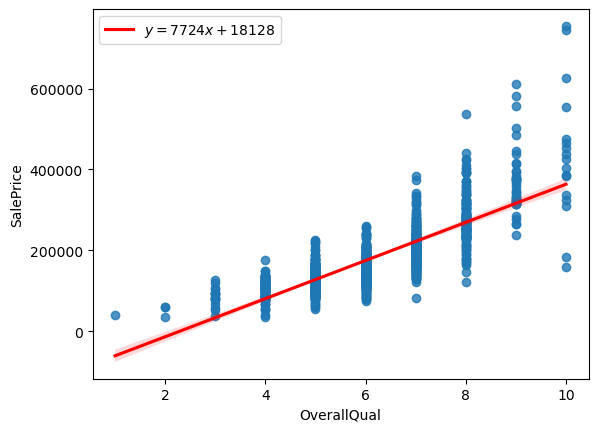

In [16]:
plt_reg = sns.regplot(data = df, x="OverallQual", y="SalePrice", line_kws={'color': 'red', 
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[1],lr_model.intercept_)})
plt.legend()  
plt.savefig('Linear Regression Model Rep')

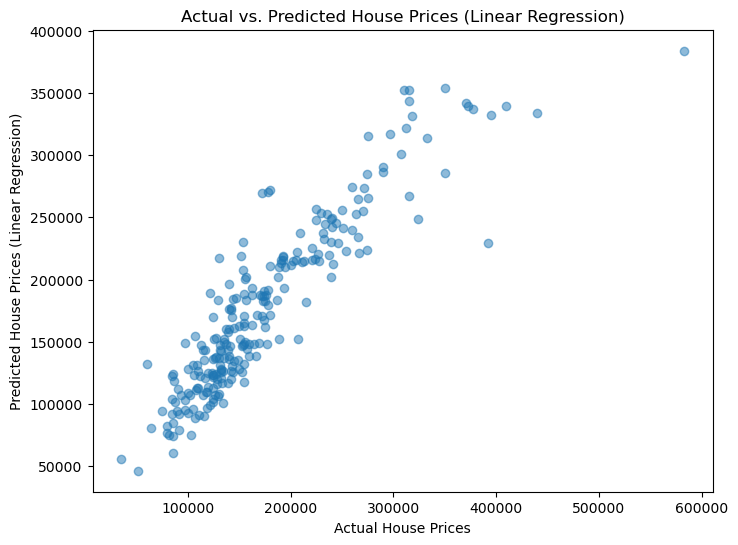

<Figure size 640x480 with 0 Axes>

In [17]:
y_pred_lr = lr_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices (Linear Regression)")
plt.title("Actual vs. Predicted House Prices (Linear Regression)")
plt.show()
plt.savefig('Linear Regression Prediction')

In [18]:
y_prediction = lr_reg.predict(X_test)

In [19]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_prediction)
mse = metrics.mean_squared_error(y_test, y_prediction)
rmse = metrics.mean_squared_error(y_test, y_prediction,squared = False)
print("Mean Absolute Error: ", mae)
print("Mean Square Error: ", mse)
print("Root Mean Square Error: ", rmse)

Mean Absolute Error:  21969.857047620022
Mean Square Error:  1060811403.0783129
Root Mean Square Error:  32570.099832182168


Experiment 2: Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_test, y_test)
forest.score(X_test, y_test)

0.9738376297191438

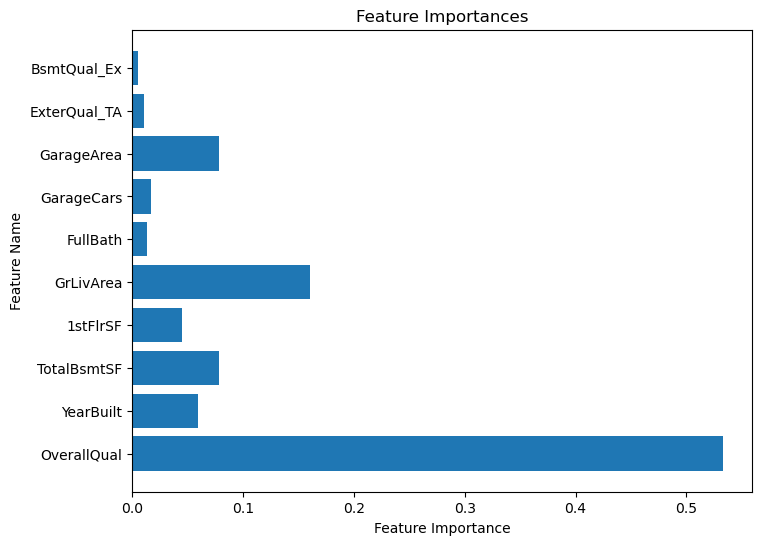

<Figure size 640x480 with 0 Axes>

In [21]:
feature_importances = forest.feature_importances_
feature_names = X_test.columns

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importances")
plt.show()
plt.savefig('Feature Importance')

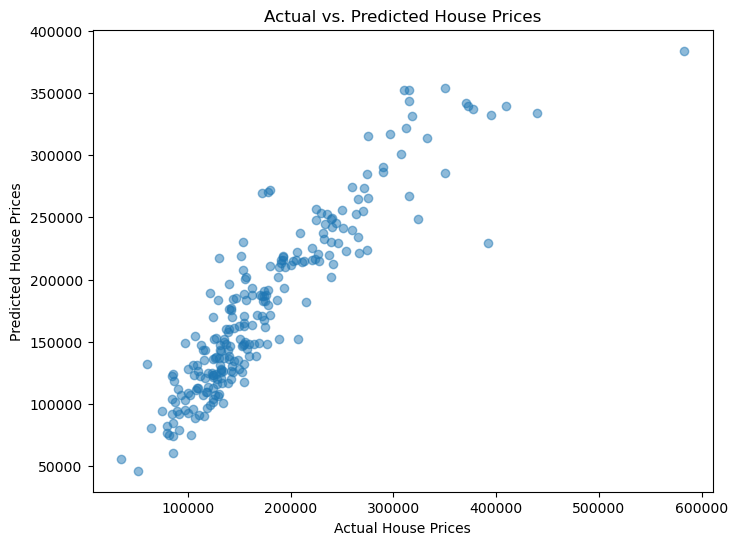

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_prediction, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()
plt.savefig('Random Regression Prediction')

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

knn_reg = KNeighborsRegressor(n_neighbors=15)

knn_reg.fit(X_train, y_train)
y_prediction = knn_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = mean_squared_error(y_test, y_prediction, squared=False)
r2 = r2_score(y_test, y_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error: 20740.638450899034
Mean Squared Error: 1033309386.0926142
Root Mean Squared Error: 32145.130052507397
R-squared (R2): 0.8291601424888321
